# MSDM5056 Tutorial 2 - Working on Networks with Python 

## Contents

1. Graph Construction
2. Adjacency Matrix
3. Bipartite Network
4. Trees and Planarity
5. Degree
6. Paths
7. Components
8. Laplacian Matrix

In [10]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

---

# 1. Using NetworkX

Throughout the whole semester, we will be using the python library [NetworkX](https://networkx.github.io/documentation/stable/reference/index.html) for the computation on networks. 


## 1.1 Graph construction

NetworkX provides four basic classes for constructing graphs:

- `Graph`
- `DiGraph`
- `MultiGraph`
- `MultiDiGraph`

While `Di` marks a graph's directedness, `Multi` allows the existence of multiple links between two nodes. In general, we will use `Graph` and `Digraph` only.

A network is internally stored as a dictionary (sources of edges) of dictionaries (tagerts of edges) of dictionaries (attributes like weights). You can use `add_nodes_from()` to add multiple nodes to a graph. Similarly, you can use `add_edges_from()` to add multiple edges to a graph, where an edge between nodes `u` and `v` is represented with the tuple `(u,v)`.

**Caution:**  You can add edges that link to non-existing nodes as NetworkX will automatically create the nodes, but this may result in unexpected side effects in some methods due to the wrongly ordered nodes.

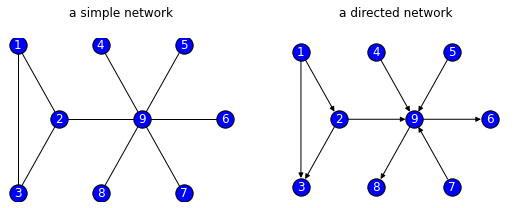

In [11]:
# Create undirected graph S
S = nx.Graph()
S.add_edges_from([(1,2), (1,3), (2,3),
                  (2,9), (4,9), (5,9),
                  (6,9), (7,9), (8,9), (9,9)])


# Create directed graph D
D = nx.DiGraph()
D.add_edges_from([(1,2), (1,3), (2,3),
                  (2,9), (4,9), (5,9),
                  (7,9), (9,6), (9,8)])

# In Digraph, (u,v) = edge from u to v



##################################################
plt.figure(figsize=(9,3))
plt.subplot(121)
plt.title('a simple network\n')
nx.draw(S, pos={1:(0,1), 2:(1,0), 3:(0,-1),
                4:(2,1), 5:(4,1), 6:(5,0),
                7:(4,-1), 8:(2,-1), 9:(3,0)},
        node_color='b', edgecolors='k',
        font_color='w', with_labels=True)


plt.subplot(122)
plt.title('a directed network\n')
nx.draw(D,pos={1:(0,1), 2:(1,0), 3:(0,-1),
               4:(2,1), 5:(4,1), 6:(5,0),
               7:(4,-1), 8:(2,-1), 9:(3,0)},
        node_color='b', edgecolors='k',
        font_color='w', with_labels=True)

plt.show()


You can use <font face="consolas">nodes</font> and <font face="consolas">edges</font> to display the nodes and edges of the network.

In [12]:
S.nodes, S.edges

(NodeView((1, 2, 3, 9, 4, 5, 6, 7, 8)),
 EdgeView([(1, 2), (1, 3), (2, 3), (2, 9), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]))

You can convert a `DiGraph` to a `Graph` with `to_directed()`. On the other hand, `to_undirected()` does the opposite job.

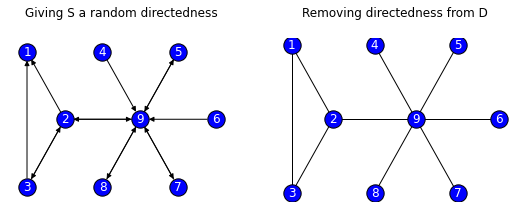

In [13]:
# Turn S to a directed graph, direction by random
S_directed = S.to_directed()
np.random.seed(5056)
actions = np.random.choice(3, S.number_of_edges())
for (u,v),a in zip(S.edges(), actions):
    # a == 0: nothing happens
    # a == 1: reverse the edge
    # a == 2: add the opposite edge
    if a > 0:
        S_directed.add_edge(v,u)
        if a == 1:
            S_directed.remove_edge(u,v)

            

# Turn D to a undirected graph
D_undirected = D.to_undirected()



##########################################################

plt.figure(figsize=(9,3))
plt.subplot(121)
plt.title('Giving S a random directedness\n')
nx.draw(S_directed,pos={1:(0,1), 2:(1,0), 3:(0,-1),
                          4:(2,1), 5:(4,1), 6:(5,0),
                          7:(4,-1), 8:(2,-1), 9:(3,0)},
        node_color='b', edgecolors='k',
        font_color='w', with_labels=True)


plt.subplot(122)
plt.title('Removing directedness from D\n')
nx.draw(D_undirected,pos={1:(0,1), 2:(1,0), 3:(0,-1),
               4:(2,1), 5:(4,1), 6:(5,0),
               7:(4,-1), 8:(2,-1), 9:(3,0)},
        node_color='b', edgecolors='k',
        font_color='w', with_labels=True)

plt.show()



The four classes all support weighted networks. You can assign a weight to an edge at the moment you add it, and you can changes the assigned weights later.

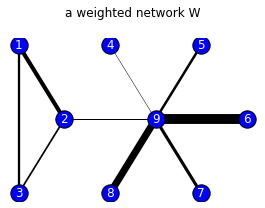

In [14]:
W = nx.Graph()
W.add_weighted_edges_from([(1,2,4.1), (1,3,2.3), (2,3,1.7),
                           (2,9,1.0), (4,9,0.5), (5,9,2.5),
                           (6,9,9.9), (7,9,3.1), (8,9,7.1)])


##############################################################
weights = [w for u,v,w in W.edges(data='weight')]

plt.figure(figsize=(4.5,3))
plt.title('a weighted network W\n')
nx.draw(W,pos={1:(0,1), 2:(1,0), 3:(0,-1),
               4:(2,1), 5:(4,1), 6:(5,0),
               7:(4,-1), 8:(2,-1), 9:(3,0)},
        node_color='b', edgecolors='k', width = weights,
        font_color='w', with_labels=True)

plt.show()

In [15]:
weights = [w for u,v,w in W.edges(data='weight')]
print(weights)

[4.1, 2.3, 1.7, 1.0, 0.5, 2.5, 9.9, 3.1, 7.1]


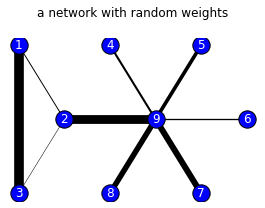

In [16]:
# randomly assigning weights to W

np.random.seed(5056)
weights = np.random.random(W.number_of_edges())*10
for e,(u,v) in enumerate(W.edges):
    W[u][v]['weight'] = weights[e]

plt.figure(figsize=(4.5,3))
plt.title('a network with random weights\n')
nx.draw(W,pos={1:(0,1), 2:(1,0), 3:(0,-1),
               4:(2,1), 5:(4,1), 6:(5,0),
               7:(4,-1), 8:(2,-1), 9:(3,0)},
        width = weights,
        node_color='b', edgecolors='k',
        font_color='w', with_labels=True)

plt.show()

## 1.2 Graph generators

NetworkX has some pre-installed [graph generator](https://networkx.github.io/documentation/stable/reference/generators.html) to some famous networks that appeared in literatures. For example,
* `erdos_renyi_graph(n, p[, seed, directed])` - Erdos Renyi graph
* `random_tree(n[, seed])` - A random tree
* `karate_club_graph()` - Zachary’s Karate Club graph

You can check out if the graph is already there before generating it by yourself.


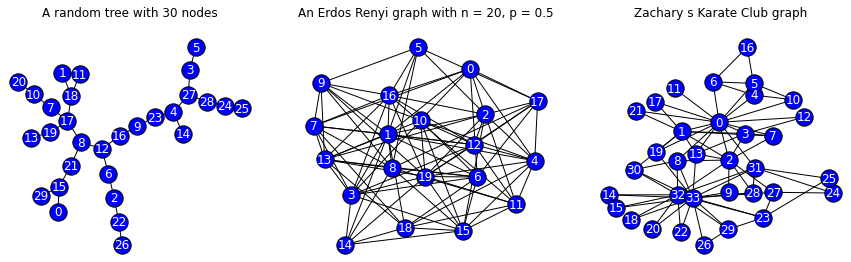

In [17]:
A = nx.generators.random_tree(30, seed=5056)
B = nx.erdos_renyi_graph(20,0.5,seed=5056)
C = nx.karate_club_graph()

##################################################################

plt.figure(figsize=(15,4))
plt.subplot(131)
plt.title('A random tree with 30 nodes\n')
nx.draw_kamada_kawai(A, with_labels=True, node_color='b', edgecolors='k', font_color='w')

plt.subplot(132)
plt.title('An Erdos Renyi graph with n = 20, p = 0.5\n')
nx.draw_kamada_kawai(B, with_labels=True, node_color='b', edgecolors='k', font_color='w')

plt.subplot(133)
plt.title('Zachary s Karate Club graph\n')
nx.draw_kamada_kawai(C, with_labels=True, node_color='b', edgecolors='k', font_color='w')

plt.show()


## 1.3 Importing data
You can also create a network by importing a data file. [Here](https://networkx.github.io/documentation/stable/reference/readwrite/index.html) is the list of all supporting file type and their corresponding read/write functions. In the tutorial files we mostly play with `.gml` data that are readily available in [Mark Newman's data set](http://www-personal.umich.edu/~mejn/netdata/). For example, I am loading the network "Les Miserables":

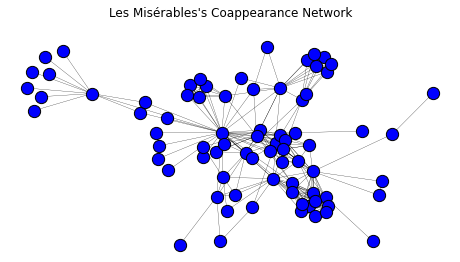

In [18]:
lesmis = nx.read_gml('data_set/lesmis/lesmis.gml')

lesmis = nx.convert_node_labels_to_integers(lesmis, label_attribute='name')
lesmis.graph['pos'] = nx.spring_layout(lesmis, seed=5056)

plt.figure(figsize=(8,4))
plt.title('Les Misérables\'s Coappearance Network'+'\n')
nx.draw(lesmis, pos=lesmis.graph['pos'], node_color='b', node_size=150, edgecolors='k', width=.25)
plt.show()

## 1.4 Graph visualization

Already seen from the above examples, we can visualize a graph by calling `nx.draw()` and similar commands. NetworkX by default calls Matplotlib for doing the plotting, and so you may also use `plt.XXX` to add titles/axis/text... to the same graph. 

However, Matplotlib only provides the basic functions. In some cases you need more advanced libraries that are tailored for drawing networks (e.g. Matplotlib cannot draw `MultiGraph`). Examples of such libraries/tools:

- [Cytoscape](https://cytoscape.org/)
- [Gephi](https://gephi.org/)
- [Graphviz](http://www.graphviz.org/)

**Remark:** Stated in its [reference](https://networkx.org/documentation/stable/reference/drawing.html), NetworkX's main goal is to enable graph analysis rather than perform graph visualization. In the future, graph visualization functionality may be removed from NetworkX or only available as an add-on package.

---

# 2. Adjacency Matrix

You can retrieve a network's adjacency matrix with `to_numpy_matrix()`. By default, the $i$-th row of an adjacency matrix `M = nx.to_numpy_array(G)` corresponds to the $i$-th node in G.nodes.

In [19]:
# Create adjancency matrix of S
nx.to_numpy_array(S).astype(int)

array([[0, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0]])

On the other hand, you can construct a network from its adjacency matrix with `from_numpy_matrix()`. The nodes will be labelled starting from 0. You can relabel them with `relabel_nodes()`, whereas you can reset the labelled nodes with `convert_node_labels_to_integers()`.

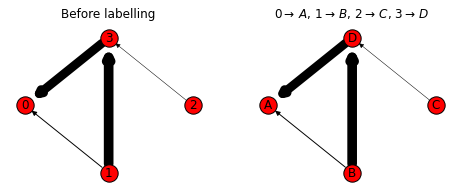

In [20]:
# define adjancency matrix A
A = np.array([[0, 0, 0, 0],
              [2, 0, 0, 1],
              [0, 0, 0, 3],
              [1, 0, 0, 0]])

# Create network G from A
G = nx.from_numpy_array(A, create_using=nx.DiGraph)



##############################################################

plt.figure(figsize=(8,3))
plt.subplot(121)
plt.title('Before labelling')
nx.draw_shell(G, width = weights, node_color='r', edgecolors='k', font_color='k', with_labels=True)

G = nx.relabel_nodes(G,dict((n, chr(n+65)) for n in G))
plt.subplot(122)
plt.title(', '.join([r'${0}\rightarrow\,{1}$'.format(i,chr(i+65)) for i in range(4)]))
nx.draw_shell(G, width = weights, node_color='r', edgecolors='k', font_color='k', with_labels=True)

plt.show()

**Pay attention to a directed network's adjacency matrix.** In NetworkX's definition, $A_{ij}=1$ represents an edge **from $i$ to $j$**, while in some literatures you may see defintions using "from $j$ to $i$". I recommend to stick with the same definition as NetworkX, since it is more convenient for matrix multiplication.

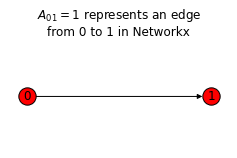

[[0 1]
 [0 0]]


In [21]:
# Create a 2 nodes directed network
G = nx.DiGraph([[0,1]])

#########################################################

plt.figure(figsize=(4,2))
plt.title(r'$A_{01}=1$'+' represents an edge\nfrom 0 to 1 in Networkx')
nx.draw(G, pos={0:(0,0), 1:(1,0)}, node_color='r', edgecolors='k', font_color='k', with_labels=True)
plt.show()

##########################################################

# Display its adjancency matrix
A = nx.to_numpy_array(G).astype(int)
print(A)

---

# 3. Bipartite Networks

A bipartite network can be created by adding an extra attribute `bipartite()` when creating the nodes.

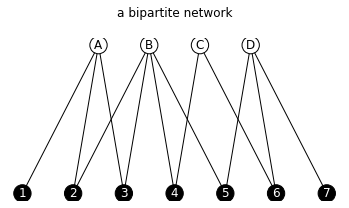

In [22]:
B = nx.Graph()

# Add first patch of nodes. bipartite set to 0
B.add_nodes_from(range(1,8,1), bipartite = 0, color='k')

# Add second patch of nodes. bipartite set to 1
B.add_nodes_from(['A','B','C','D'], bipartite = 1, color='w')

B.add_edges_from([('A',1), ('A',2), ('A',3),
                  ('B',2), ('B',3), ('B',4), ('B',5),
                  ('C',4), ('C',6),
                  ('D',5), ('D',6), ('D',7)])


###########################################################

pos = dict((chr(i+65),(1.5+i,1)) for i in range(4))
for i in range(7): pos[i+1] = (i,0)

plt.figure(figsize=(6,3))
plt.title('a bipartite network\n')
nx.draw_networkx_labels(B, pos, font_color='w',
                        labels=dict((i,i) for i in range(1,8)))
nx.draw_networkx_labels(B, pos, font_color='k',
                        labels=dict((chr(i),chr(i)) for i in range(65,69)))
nx.draw(B, pos, edgecolors='k',
        node_color=[c for n,c in B.nodes.data('color')])

plt.show()


We can use the function `is_bipartite()` to check whether the graph is bipartite. We can also use the function `bipartite.sets()` to separate the nodes of a bipartite graph into two sets. The functions are using the two-coloring algorithm:

1. All nodes are initially uncoloured.
2. Paint a node with one colour $C_1$.
3. Paint its neigbhours with another colour $C_2$.
4. Paint its neighbours' neighbours with $C_1$.
5. Repeat steps 3 and 4.
6. A network is bipartite if all nodes can be coloured without contradiction, and each set of coloured nodes forms a bipartition.

In [23]:
# display 
print('The graph is {}bipartite.'.format('' if nx.is_bipartite(B) else 'not '))
print('\n')

[B1,B2] = nx.bipartite.sets(B)
print('First set of nodes are ', B1)
print('Second set of nodes are ', B2)

The graph is bipartite.


First set of nodes are  {1, 2, 3, 4, 5, 6, 7}
Second set of nodes are  {'B', 'D', 'A', 'C'}


You can also project a bipartite network on one of its bipartite sets with `projected_graph()`. 

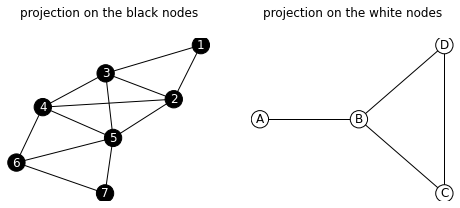

In [24]:
BonB1 = nx.projected_graph(B, B1)
BonB2 = nx.projected_graph(B, B2)

#############################################################

plt.figure(figsize=(8,3))
plt.subplot(121)
plt.title('projection on the black nodes\n')
nx.draw_kamada_kawai(BonB1, with_labels=True, font_color='w', edgecolors='k',
                     node_color=[c for n,c in BonB1.nodes.data('color')])

plt.subplot(122)
plt.title('projection on the white nodes\n')
nx.draw_kamada_kawai(BonB2, with_labels=True, font_color='k', edgecolors='k',
                     node_color=[c for n,c in BonB2.nodes.data('color')])

plt.show()

---

# 4. Trees and Planarity

A tree is an acyclic graph. A tree has two properties:
1. an $n$-node tree has $(n-1)$ edges; and
2. a tree is planar, i.e. it can drawn on a plane with no intersecting edges.

You can test a network's planarity with `check_planarity()`, whose algorithm is based on <a href="https://en.wikipedia.org/wiki/Kuratowski%27s_theorem">Kuratowski's theorem</a>.

A tree is planar.


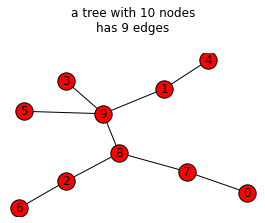

In [25]:
T = nx.random_tree(10, seed=5056)
print('A tree is {}planar.'.format('' if nx.check_planarity(T)[0] else 'not '))

##############################################################

plt.figure(figsize=(4.5,3))
plt.title('a tree with {} nodes\nhas {} edges\n'.format(T.number_of_nodes(), T.number_of_edges()))
nx.draw_kamada_kawai(T, with_labels=True, node_color='r', edgecolors='k', font_color='k')
plt.show()

The Petersen graph is not a tree.
It is not planar.


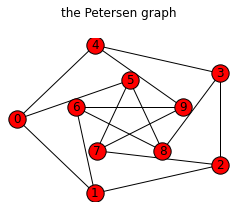

In [26]:
petersen = nx.petersen_graph()
print('The Petersen graph is {}a tree.'.format('' if nx.is_tree(petersen) else 'not '))
print('It is {}planar.'.format('' if nx.check_planarity(petersen)[0] else 'not '))

##################################################################

plt.figure(figsize=(4,3))
plt.title('the Petersen graph\n')
P_pos = nx.shell_layout(petersen, [list(range(5,10)), list(range(5))])
nx.draw(petersen, pos=P_pos, with_labels=True, node_color='r', edgecolors='k', font_color='k')
plt.show()

## 4.1 Minimum spanning tree

A graph's subgraph is a spanning tree if it contains all nodes and has no cycles, and a spanning tree is a minimum spanning tree (MST) if it traverses edges with the smallest total weight. A weighted network has a unique MST as long as its edges carry distinct weights.

You can compute a graph's MST with <a href="https://en.wikipedia.org/wiki/Kruskal%27s_algorithm">Kruskal's algorithm</a>: for a $n$-node graph $G$,

1. create an edgeless copy $H$ of $G$;
2. add (one of) the lightest edge(s) of $G$ to $H$ if it connects two trees;
3. remove the edge from $G$;
4. repeat steps 2 and 3 until $H$ connects all nodes.

Finally, $H$ is the MST of $G$. Of course, you can directly carry out the task with `algorithms.tree.minimum_spanning_tree()`.

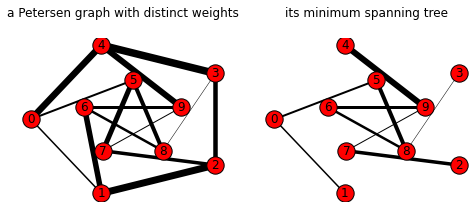

In [27]:
np.random.seed(5056)
PW = nx.petersen_graph()
weights = np.random.choice(range(1, petersen.number_of_edges()+1), petersen.number_of_edges(), False)/2
for e,w in zip(petersen.edges(),weights):
    PW.add_edge(*e, weight=w)
    
    
P_MST = nx.minimum_spanning_tree(PW)



#####################################################

plt.figure(figsize=(8,3))
plt.subplot(121)
plt.title('a Petersen graph with distinct weights\n')
nx.draw(PW, pos=P_pos, with_labels=True, node_color='r', edgecolors='k', font_color='k', width=weights)

plt.subplot(122)
plt.title('its minimum spanning tree\n')
nx.draw(P_MST, pos=P_pos, with_labels=True, node_color='r', edgecolors='k', font_color='k',
        width=[w for u,v,w in P_MST.edges(data='weight')])
plt.show()

## 4.2 Planar maximally filtered graph

An graph's planar maximally filtered graph (PMFG) is the heavist planar subgraph of its complete counterpart in which each edge is assigned a weight equal to the distance between the termini in the orignal graph [<a href="https://www.pnas.org/content/102/30/10421">Tumminello, M., Aste, T., Di Matteo, T., Mantegna, R. N: A tool for filtering information in complex systems. In: PNAS, Vol. 102. (2005) 10421-10426</a>].

NetworkX does not provide any methods for computing a graph's PMFG, but you can build it with the following algorithm: starting with an $n$-node graph $G$ and its edgeless copy $H$,

1. create an $n$-node complete graph $K$;
2. assign each edge $(u,v)$ in $K$ a weight $w=\text{distance}_G\left(u,v\right)$;
3. add (one of) the heavist edge(s) of $K$ to $H$;
4. remove the edge from $H$ if it makes $H$ non-planar;
5. remove the edge from $K$; and
6. repeat from step 1 to step 3 until you have exhausted all edges in $K$.

Finally, $H$ is the required PMFG, which definitely has a PMFG with $3(n-2)$ edges.

The PMFG is predicted to have 3*(10-2) = 24 edges, and it has 24 edges.


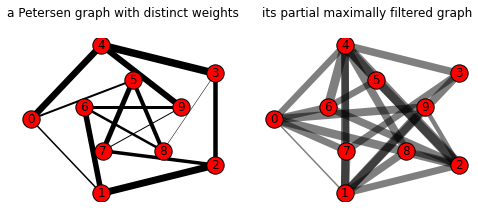

In [28]:
def PMFG(G):
    from itertools import combinations
    paths = list(combinations(range(G.number_of_nodes()), 2))
    dists = nx.floyd_warshall_numpy(G) # a distance matrix
    
    H = nx.create_empty_copy(G)
    for i,j in sorted(paths, key=lambda p: dists[p[0],p[1]], reverse=True):
        H.add_edge(i,j, weight=dists[i,j])
        if not nx.check_planarity(H)[0]:
            H.remove_edge(i,j)
    return H


###########################################################################

P_PMFG = PMFG(PW)


###########################################################################

n = P_PMFG.number_of_nodes()
print('The PMFG is predicted to have 3*({0}-2) = {1} edges, '.format(n, 3*(n-2)), end='')
print('and it has {} edges.'.format(P_PMFG.number_of_edges()))


plt.figure(figsize=(8,3))
plt.subplot(121)
plt.title('a Petersen graph with distinct weights\n')
nx.draw(PW, pos=P_pos, with_labels=True, node_color='r', edgecolors='k', font_color='k', width=weights)

plt.subplot(122)
plt.title('its partial maximally filtered graph\n')
nx.draw_networkx_edges(P_PMFG, pos=P_pos, alpha=.5,
                       width=[w for u,v,w in P_PMFG.edges(data='weight')])
nx.draw(P_PMFG, pos=P_pos, edgelist=[], with_labels=True, node_color='r', edgecolors='k', font_color='k')

plt.show()



---

# 5. Degree

You can use `degree()` to get a dictionary-like object that contains all nodes' degrees.

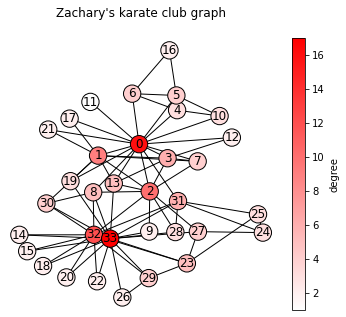

In [29]:
karate = nx.karate_club_graph()
degrees = [k for n,k in karate.degree]

import matplotlib as mpl
cmap = mpl.colors.LinearSegmentedColormap.from_list('', ['w','r'])
norm = mpl.colors.Normalize(vmin=min(degrees), vmax=max(degrees))
smap = mpl.cm.ScalarMappable(norm, cmap)
smap.set_array([])

plt.figure(figsize=(6,5))
plt.title('Zachary\'s karate club graph\n')
plt.colorbar(smap, label='degree')
nx.draw_kamada_kawai(karate, with_labels=True, edgecolors='k', node_color=degrees, cmap=cmap)

plt.show()

There are many ways to plot a network's degree distribution. Here I demonstrate three methods, viz. `nx.degree_histogram()` from NetworkX, `np.histogram()` from NumPy, and `plt.hist()` from Matplotlib. As the maximum degree of a network grows, the NumPy method usually produces the tidiest plot.

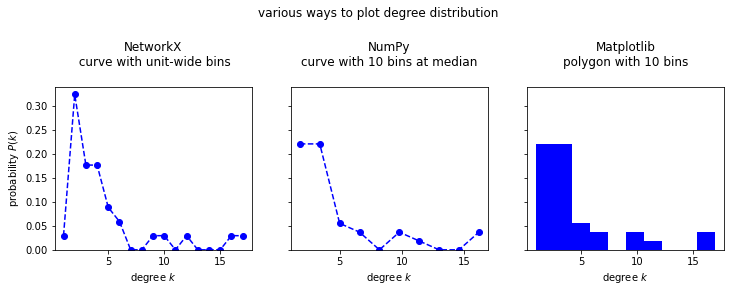

In [30]:
fig,ax = plt.subplots(1, 3, sharey=True, figsize=(12,3))
fig.suptitle('various ways to plot degree distribution', y=1.25)

kmin,kmax = min(degrees),max(degrees)

# plotting by nx.degree_histogram
ax[0].plot(range(kmin,kmax+1),
           np.array(nx.degree_histogram(karate)[kmin:])/karate.number_of_nodes(), 'bo--')
ax[0].set_title('NetworkX\n curve with unit-wide bins\n')
ax[0].set_ylabel(r'probability $P(k)$')


# plotting by numpy's histogram
prob,bins = np.histogram(degrees, bins=10, density=True)
ax[1].plot((bins[1:]+bins[:-1])/2, prob,'bo--')
ax[1].set_title('NumPy\ncurve with 10 bins at median\n')


# plotting by matplotlib's hist
ax[2].hist(degrees, bins=10, color='b', density=True)
ax[2].set_title('Matplotlib\npolygon with 10 bins\n')

for i in range(3):
    ax[i].set_xlabel(r'degree $k$')

For a `DiGraph`, `degree()` returns the sum of in-degrees and out-degrees, which can be respectively retrieved with `in_degree()` and `out_degree()`.

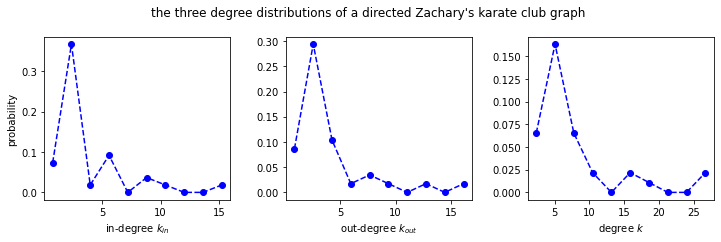

In [31]:
KD = karate.to_directed()
np.random.seed(5056)
actions = np.random.choice(3, karate.number_of_edges())
for (u,v),a in zip(karate.edges(), actions):
    if a > 0:
        KD.add_edge(v,u)
        if a == 1:
            KD.remove_edge(u,v)
            
            
#############################################################            

inDegrees = [kIn for n,kIn in KD.in_degree()]
outDegrees = [kOut for n,kOut in KD.out_degree()]
degrees = [k for n,k in KD.degree()]

#############################################################

fig,ax = plt.subplots(1, 3, figsize=(12,3))
fig.suptitle('the three degree distributions of a directed Zachary\'s karate club graph', y=1.02)
plt.subplots_adjust(wspace=.3)
ax[0].set_ylabel('probability')

for i,ks in enumerate([inDegrees, outDegrees, degrees]):
    prob,bins = np.histogram(ks, bins=10, density=True)
    ax[i].plot((bins[1:]+bins[:-1])/2, prob,'bo--')
    ax[i].set_xlabel(r'{}degree '.format('in-' if i==0 else ('out-' if i==1 else ''))+
                     r'{}'.format(format('$k_{in}$' if i==0 else ('$k_{out}$' if i==1 else '$k$'))))

---

# 6. Paths

## 6.1 Shortest paths

NetworkX provides <a href="https://networkx.github.io/documentation/stable/reference/algorithms/shortest_paths.html">a bunch of methods for finding shortest paths and computing their lengths</a>. The methods are devised based on various algorithms, whose different assumptions result in their different time complexity, i.e. performance. In general, you need different methods of different kinds of networks. The basic methods of NetworkX are `shortest_path()` and `shortest_path_legnth()`. They provide two options of algorithms - Dijkstra's algorithm and Bellman-Ford algorithm. 

Check <a href="https://en.wikipedia.org/wiki/Shortest_path_problem">Shorteset path problem</a> on Wikipedia to know more about various path-finding algorithms.

The diameter of Zachary's karate graph is 5.
One of the 5-edge paths on the graph is [14, 32, 2, 0, 5, 16].
The average distance of the graph is around 2.41.


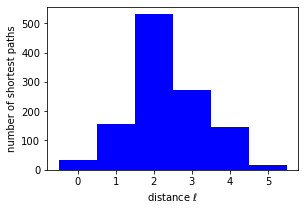

In [32]:
d = nx.diameter(karate) # diameter = shortest path between two most distant nodes
A = nx.to_numpy_array(karate)
A_power = np.linalg.matrix_power(A, d-1) 
us,vs = np.where(A_power==0)

print('The diameter of Zachary\'s karate graph is {}.'.format(d))
print('One of the {0}-edge paths on the graph is {1}.'.format(d, nx.shortest_path(karate, us[0], vs[0])))
print('The average distance of the graph is around {:.3g}.'.format(nx.average_shortest_path_length(karate)))

# NetworkX uses Dijkstra's algorithm by default
# Here I use Floyd-Warshall algorithm instead
dists = nx.floyd_warshall_numpy(karate).astype(int)

plt.figure(figsize=(4.5,3))
plt.hist(np.asarray(dists).flatten(), bins=np.arange(-0.5,d+1.5,1), color='b')
plt.xlabel('distance $\ell$')
plt.ylabel('number of shortest paths')
plt.show()

## 6.2 Independent paths

You can compute the node- or the edge-independent paths between two nodes with `node_disjoint_paths()` and `edge_disjoint_paths()`.

The node connectivity between A and B is 1.
The edge connectivity between A and B is 2.
A set of node-independent paths between A and B is [['A', 0, 'C', 2, 'B']].
A set of edge-independent paths between A and B is [['A', 0, 'C', 3, 'B'], ['A', 1, 'C', 2, 'B']].


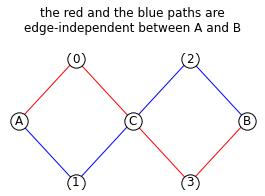

In [33]:
doubleDiamond = nx.Graph()
doubleDiamond.add_edges_from([('A',0), ('A',1), ('C',0), ('C',1),
                              ('B',2), ('B',3), ('C',2), ('C',3)])



node_disj = list(nx.node_disjoint_paths(doubleDiamond, 'A', 'B'))
edge_disj = list(nx.edge_disjoint_paths(doubleDiamond, 'A', 'B'))

print('The node connectivity between A and B is {}.'.format(len(node_disj)))
print('The edge connectivity between A and B is {}.'.format(len(edge_disj)))
print('A set of node-independent paths between A and B is {}.'.format(node_disj))
print('A set of edge-independent paths between A and B is {}.'.format(edge_disj))


##############################################################

DD_pos = {'A':(0,0), 'C':(1,0), 'B':(2,0),
          0:(.5,1), 1:(.5,-1), 2:(1.5,1), 3:(1.5,-1)}

plt.figure(figsize=(4.5,2.5))
plt.title('the red and the blue paths are\nedge-independent between A and B\n')
for e,c in zip(edge_disj, ['r','b']):
    edgelist = [(e[i],e[i+1]) for i in range(len(e)-1)]
    nx.draw_networkx_edges(doubleDiamond, DD_pos, edgelist=edgelist, edge_color=c)
nx.draw(doubleDiamond, pos=DD_pos, edgelist=[],
        with_labels=True, edgecolors='k', node_color='w')
plt.show()

## 6.3 Eulerian paths

You can use `eulerian_circuit()` to compute Eulerian circuits, i.e. Eulerian paths starting and ending at the same node.

An example of Eulerian circuit is [('A', 1), (1, 'C'), ('C', 3), (3, 'B'), ('B', 2), (2, 'C'), ('C', 0), (0, 'A')].


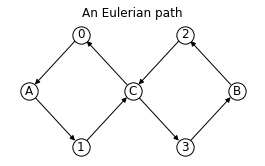

In [34]:
euler = list(nx.eulerian_circuit(doubleDiamond))
print('An example of Eulerian circuit is {}.'.format(euler))

doubleDiamond_euler = nx.DiGraph()
doubleDiamond_euler.add_edges_from(euler)

#####################################################################

plt.figure(figsize=(4.5,2.5))
plt.title('An Eulerian path')
nx.draw(doubleDiamond_euler, pos=DD_pos, with_labels=True, edgecolors='k', node_color='w')
plt.show()

## 6.4 Minimal cut sets

You can use `minimum_node_cut()` and `minimum_edge_cut()` to produce minimal vertex cut set and minimal edge cut set respectively. Note that minimal cut sets are not unique, and the functions will only return one possible solution. 

Finding the minimal cut set to disconnect in the Zachary's karate graph between nodes 14 and 16
One of the minimal vertex cut set is [0]
One of the minimal edge cut set is: [(5, 16), (6, 16)]


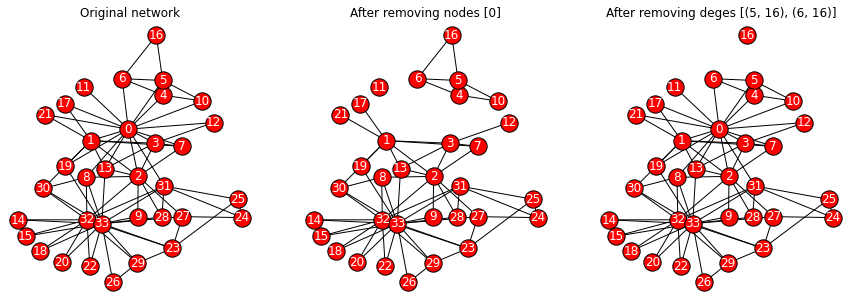

In [35]:
print('Finding the minimal cut set to disconnect in the Zachary\'s karate graph between nodes {0} and {1}'.format(us[0], vs[0]))

KC1 = karate.copy()
node_cut = list(nx.minimum_node_cut(KC1, us[0], vs[0]))
KC1.remove_nodes_from(node_cut)
print('One of the minimal vertex cut set is {}'.format(node_cut))

KC2 = karate.copy()
edge_cut = list(nx.minimum_edge_cut(KC2, us[0], vs[0]))
KC2.remove_edges_from(edge_cut)
print('One of the minimal edge cut set is: {}'.format(edge_cut))


###################################################################################

plt.figure(figsize=(15,5))

plt.subplot(131)
plt.title('Original network')
nx.draw_kamada_kawai(karate, with_labels=True, node_color='r', edgecolors='k', font_color='w')

plt.subplot(132)
plt.title('After removing nodes {}'.format(node_cut))
nx.draw(KC1, pos=nx.kamada_kawai_layout(karate), with_labels=True, node_color='r', edgecolors='k', font_color='w' )

plt.subplot(133)
plt.title('After removing deges {}'.format(edge_cut))
nx.draw(KC2, pos=nx.kamada_kawai_layout(karate), with_labels=True, node_color='r', edgecolors='k', font_color='w')

plt.show()


---

# 7. Components

You can check a network's connectedness with `is_connected()`. You should always check it before computing a network's average path length, otherwise an error may arise. In addition, you can split a network into its connected components with `connected_components()` and compute its amount with `number_connected_components()`.

For a `DiGraph`, you may use `weakly_connected()` or `strongly_connected()` to get information about its weakly or strongly connected components.

The Zachary's karate graph is connected.
After removing the 4 highest-degree nodes, it is no longer connected.
It has 10 connected components:


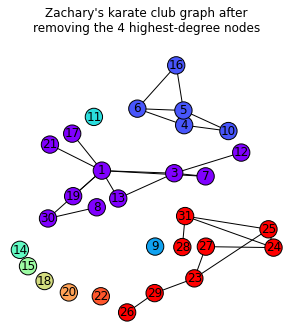

In [36]:
print('The Zachary\'s karate graph is {}connected.'.format('' if nx.is_connected(karate) else 'not '))

KC = karate.copy()
KC.remove_nodes_from(sorted(karate.nodes, key=lambda i: KC.degree(i))[-4:])
print('After removing the 4 highest-degree nodes, it is {} connected.'\
      .format('still' if nx.is_connected(KC) else 'no longer'))
print('It has {} connected components:'.format(nx.number_connected_components(KC)))

for i,component in enumerate(nx.connected_components(KC)):
    for node in component:
        KC.nodes[node]['c'] = i

plt.figure(figsize=(5,5))
plt.title('Zachary\'s karate club graph after\nremoving the 4 highest-degree nodes\n')
nx.draw(KC, pos=nx.kamada_kawai_layout(karate),
        with_labels=True, edgecolors='k', cmap='rainbow',
        node_color=[c for n,c in KC.nodes(data='c')])
plt.show()

You can use `k_components()` to get a dictionary of $k$-components keyed with $k$.

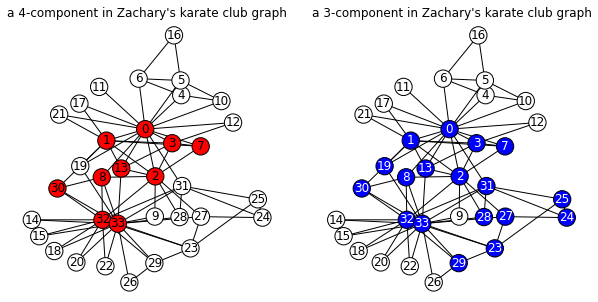

In [37]:
kcomps = nx.k_components(karate)
kmax = list(kcomps.keys())[0]

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('a {}-component in Zachary\'s karate club graph'.format(kmax))
nx.draw_kamada_kawai(karate, with_labels=True, edgecolors='k',
                     node_color=['r' if i in kcomps[kmax][0] else 'w' for i in karate.nodes])

plt.subplot(122)
plt.title('a {}-component in Zachary\'s karate club graph'.format(kmax-1))
nx.draw_networkx_labels(karate, pos=nx.kamada_kawai_layout(karate), font_color='w',
                        labels=dict((i,i) for i in kcomps[kmax-1][0]))
nx.draw_networkx_labels(karate, pos=nx.kamada_kawai_layout(karate), font_color='k',
                        labels=dict((i,i) for i in set(range(karate.number_of_nodes()))-kcomps[kmax-1][0]))
nx.draw_kamada_kawai(karate, edgecolors='k', node_color=['b' if i in kcomps[kmax-1][0] else 'w' for i in karate.nodes])

plt.show()

---

# 8. Laplacian Matrix

You can use `laplacian_matrix()` to compute a graph's Laplacian matrix, which is returned as a SciPy matrix. You can also get its spectrum, i.e. set of eigenvalues, with `laplacian_spectrum()`.

In [38]:
nx.laplacian_matrix(karate).toarray()

array([[16, -1, -1, ..., -1,  0,  0],
       [-1,  9, -1, ...,  0,  0,  0],
       [-1, -1, 10, ...,  0, -1,  0],
       ...,
       [-1,  0,  0, ...,  6, -1, -1],
       [ 0,  0, -1, ..., -1, 12, -1],
       [ 0,  0,  0, ..., -1, -1, 17]], dtype=int32)

In [39]:
nx.laplacian_spectrum(karate)

array([-9.49934576e-15,  4.68525227e-01,  9.09247664e-01,  1.12501072e+00,
        1.25940411e+00,  1.59928308e+00,  1.76189862e+00,  1.82605521e+00,
        1.95505045e+00,  2.00000000e+00,  2.00000000e+00,  2.00000000e+00,
        2.00000000e+00,  2.00000000e+00,  2.48709173e+00,  2.74915718e+00,
        3.01396297e+00,  3.24206748e+00,  3.37615409e+00,  3.38196601e+00,
        3.47218740e+00,  4.27587682e+00,  4.48000767e+00,  4.58079267e+00,
        5.37859508e+00,  5.61803399e+00,  6.33159222e+00,  6.51554463e+00,
        6.99619703e+00,  9.77724095e+00,  1.09210675e+01,  1.33061223e+01,
        1.70551712e+01,  1.81366960e+01])

The number of components in a graph equals the number of zeros in the spectrum of its Laplacian matrix. Remember that a very small floating-point number is also zero due to a computer's limited precision.

In [40]:
print('After removing its 4 highest-degree nodes, ', end='')
print('Zachary\'s karate club graph has {} connected components:'.format(nx.number_connected_components(KC)))

print('Number of zeros in the graph\'s spectrum:', (nx.laplacian_spectrum(KC)<1e-6).sum())

After removing its 4 highest-degree nodes, Zachary's karate club graph has 10 connected components:
Number of zeros in the graph's spectrum: 10
